# Classification: kNN

## Pre-Processing

In [2]:
import pandas as pd #Importing pandas library
from pandas import DataFrame 
import numpy as np #Importing numpy library
import matplotlib.pyplot as plt #Importing Matplotlib library's "pyplot"
import seaborn as sns  # Imorting Seaborn library
import os

data = pd.read_csv("breast_cancer.csv")
data

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# replace the diagnosis with binary numbers instead of M (malignant) or B (benign)
data.drop('id', axis=1, inplace=True)
data['diagnosis'] = data['diagnosis'].replace('M', 0)
data['diagnosis'] = data['diagnosis'].replace('B', 1)
data.head()

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
Malignant, Benign = data.diagnosis.value_counts()
Malignant, Benign

(357, 212)

<AxesSubplot:>

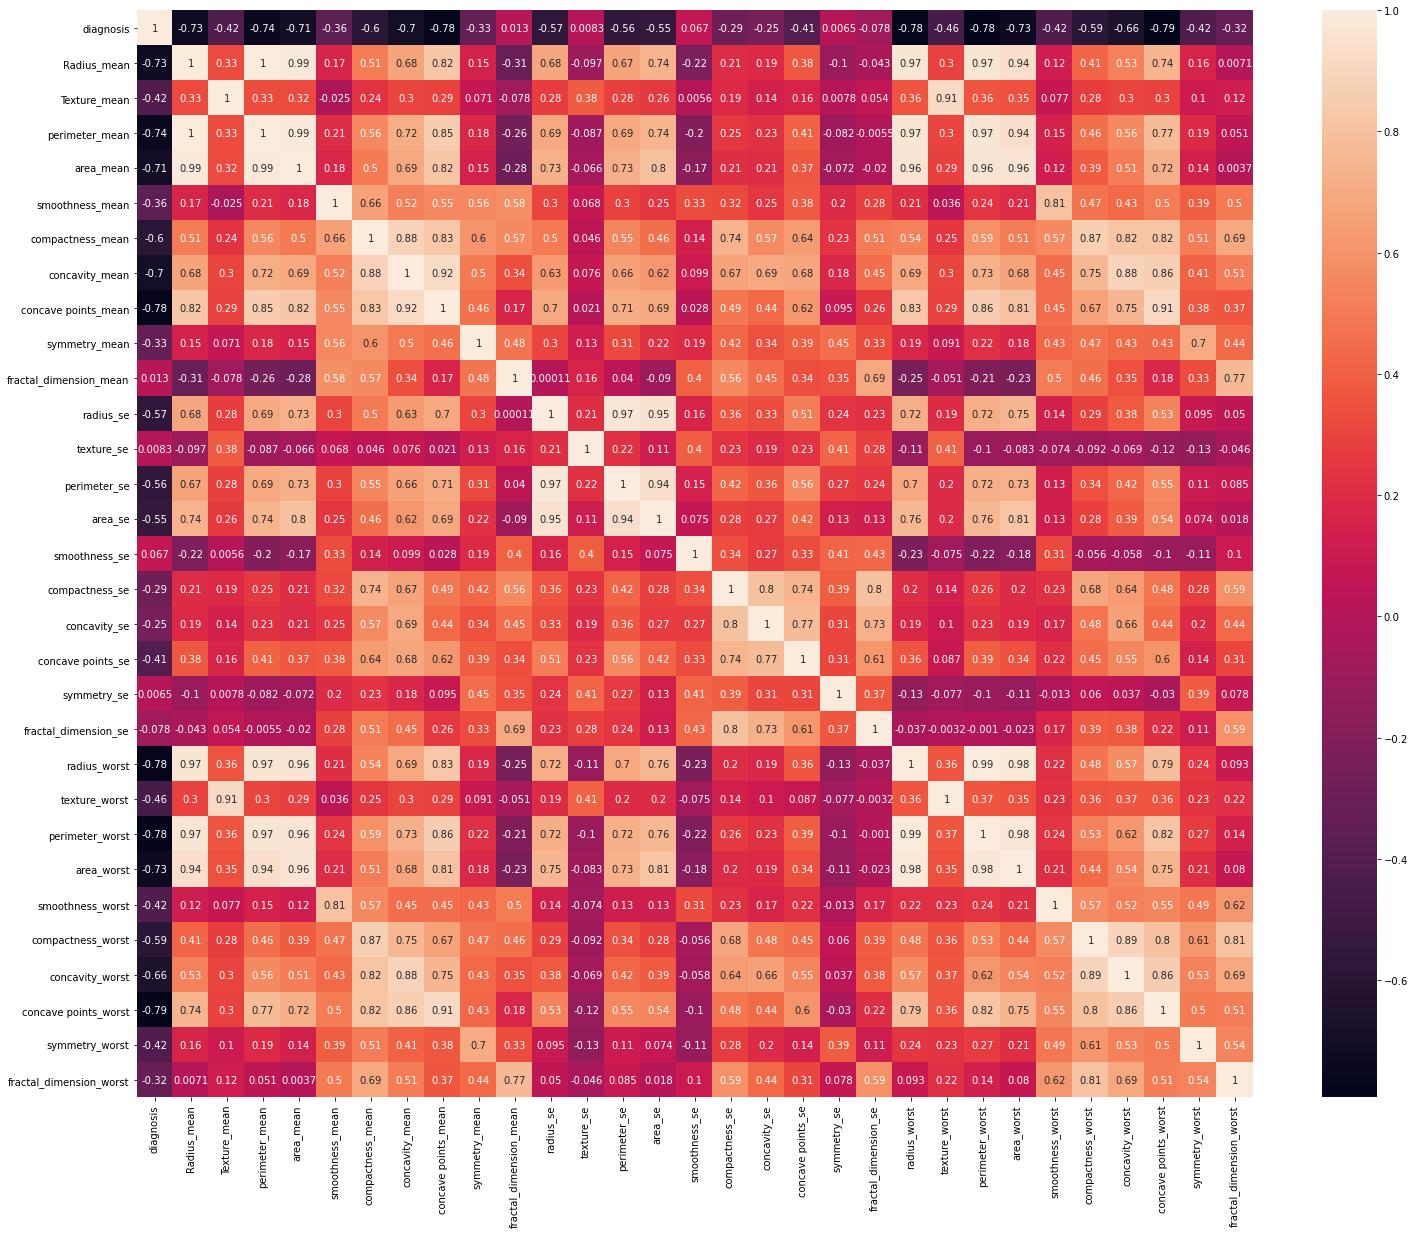

In [5]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(data.corr( ), annot=True, xticklabels=True, yticklabels=True,)
#Show Correlation Matrix

In [6]:
#Removing Highly Correlated Data
data.drop(['perimeter_mean','perimeter_se','perimeter_worst'], axis='columns',inplace=True)
data.drop(['Radius_mean','radius_se','radius_worst'], axis='columns',inplace=True)
data.drop(['symmetry_se','texture_se','smoothness_se','fractal_dimension_se'], axis='columns',inplace=True)
data.drop('fractal_dimension_mean', axis='columns',inplace=True)
data.drop('Texture_mean', axis='columns',inplace=True)
data.drop(['area_mean','compactness_worst'], axis='columns',inplace=True)

<AxesSubplot:>

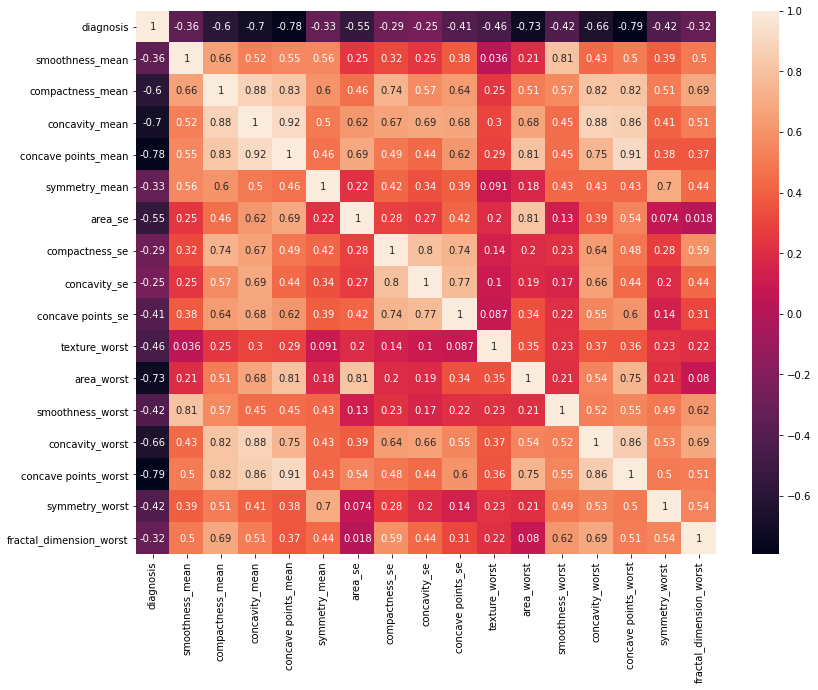

In [7]:
plt.figure(figsize=(13,10))
sns.heatmap(data=data.corr(), annot=True)
#Show Updated Correlation Matrix

## Building a Model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# remove target variable from dataset to make feature matrix (X)
X = data.drop(columns=['diagnosis'])
# target vector (y) - desired output
y = data.diagnosis

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn = knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
knn

KNeighborsClassifier(n_neighbors=20)

In [12]:
train_score= knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)
print("training score:", train_score, "\ntest score:", test_score)

training score: 0.9131455399061033 
test score: 0.9300699300699301


<function matplotlib.pyplot.show(close=None, block=None)>

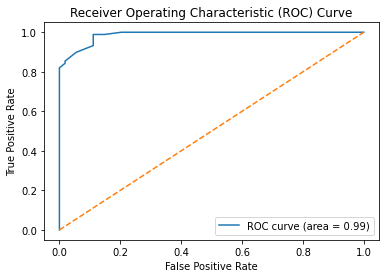

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#get decision values for test set
y_scores = knn.predict_proba(x_test)

#get ROC curve and AUC (area under curve)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show

Text(33.0, 0.5, 'True')

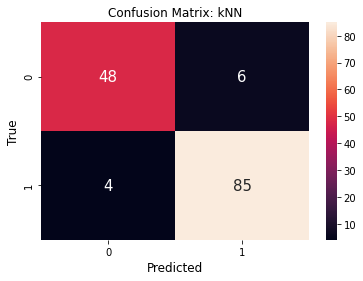

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

sns.heatmap(cm,annot_kws={"fontsize":15}, annot=True)
plt.title('Confusion Matrix: kNN', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

#0: malignant
#1: benign

- 48 true positives (correct positive diagnoses) (predict malignant, is malignant)
- 85 true negatives (correct negative diagnosses) (predict benign, is benign)
- 4  false positives (incorrect positive diagnoses) (predict malignant, is benign)
- 6 false negative (incorrect negative diagnoses) (predict benign, is malignant)